## Homework

This week we are going to use a new data set which contains 1070 purchases where the customer either purchased Citrus Hill or Minute Maid Orange Juice. 

In [1]:
import pandas as pd
oj = pd.read_csv('data/OJ.csv')
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,0,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,0,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,1,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,0,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [2]:
oj.shape

(1070, 18)

In [3]:
oj.data = oj.iloc[:, 1:]
oj.target = oj.iloc[:, 0]

The features and the target variable are already prepared for you. What you are going to do is:

**1. Split**

Split the data set into two parts: training set and test set(with *random_state=0*, and *test_size=1.0/2*).


In [4]:
### your solution

import sklearn.model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(oj.data, oj.target, test_size=1.0/2, random_state=0)

**2. Support vector machine**

(1) Fit a svm model on the training set, report the training error and test error.(Just use the **svm.SVC** with default setting.)
    
(2) Change the value of parameter $C$ from $10^{-3}$ to $10^3$, make a plot to watch how the training error and test error varies. You can choose the value of $C$ from the array `np.logspace(-3, 3, 300)`.

In [5]:
# 1) 

from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

print 'training error: %.3f: ' %(1-svm_model.score(x_train, y_train))
print 'test error: %.3f: ' %(1-svm_model.score(x_test, y_test))

training error: 0.226: 
test error: 0.303: 


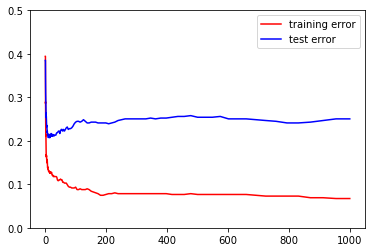

In [6]:
# 2)

import numpy as np

C = np.logspace(-3, 3, 300)
train_error = []
test_error = []
for i in C:
    svm_model.set_params(C=i)
    svm_model.fit(x_train, y_train)
    train_error.append(1 - svm_model.score(x_train, y_train))
    test_error.append(1 - svm_model.score(x_test, y_test))

import matplotlib.pyplot as plt
plt.plot(C, train_error, c='red', label='training error')
plt.plot(C, test_error, c='blue', label='test error')
plt.ylim(0, 0.5)
plt.legend()
plt.show()

**3. Decision tree**

(1) Fit a decision tree model on the training set with the default setting.
    
(2) Set the depth of the tree from 1 to 30. Look the varies of the training error and test error.
    
(3) Use the function **grid_search.GridSearchCV** to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. 

(4) What are the first 5 important features?

In [7]:
# 1)

from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

tree_model.fit(x_train, y_train)
print 'training error: %.3f: ' %(1-tree_model.score(x_train, y_train))
print 'test error: %.3f: ' %(1-tree_model.score(x_test, y_test))

training error: 0.007: 
test error: 0.230: 


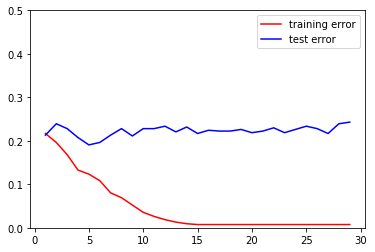

In [8]:
# 2)

depth = range(1, 30)
train_error = []
test_error = []
for i in depth:
    tree_model.set_params(max_depth=i, min_samples_leaf=1)
    tree_model.fit(x_train, y_train)
    train_error.append(1 - tree_model.score(x_train, y_train))
    test_error.append(1 - tree_model.score(x_test, y_test))

import matplotlib.pyplot as plt
plt.plot(depth, train_error, c='red', label='training error')
plt.plot(depth, test_error, c='blue', label='test error')
plt.ylim(0, 0.5)
plt.legend()
plt.show()

In [9]:
# 3)

#grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}

from sklearn.model_selection import GridSearchCV
grid_para_tree = [{
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}]
tree_model.set_params(random_state=0)
grid_search_tree = GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy', n_jobs=-1).fit(x_train, y_train)


In [10]:
## best parameters
grid_search_tree.best_params_

{'criterion': 'gini', 'min_samples_leaf': 9, 'min_samples_split': 26}

In [11]:
## best score
grid_search_tree.best_score_

0.82429906542056075

In [12]:
## training error and test error of the best model

best_tree = grid_search_tree.best_estimator_

print 'best tree training error: %.3f: ' %(1-best_tree.score(x_train, y_train))
print 'best tree test error: %.3f: ' %(1-best_tree.score(x_test, y_test))

best tree training error: 0.142: 
best tree test error: 0.206: 


**4. Random Forest.**

(1) Fit a random forest on the training set. Report the training error and test error.
    
(2) Use the function **grid_search.GridSearchCV** to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. 

(3) What's the first 5 important features?

In [13]:
# 1)

from sklearn import ensemble
rf_model = ensemble.RandomForestClassifier()
rf_model.fit(x_train, y_train)

print 'training error: %.3f: ' %(1-rf_model.score(x_train, y_train))
print 'test error: %.3f: ' %(1-rf_model.score(x_test, y_test))

training error: 0.019: 
test error: 0.234: 


In [14]:
# 2)

grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

grid_search_forest = GridSearchCV(rf_model, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1).fit(x_train, y_train)

In [15]:
## best parameters
grid_search_forest.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 80}

In [16]:
## best score
grid_search_forest.best_score_

0.82056074766355136

In [17]:
## training error and test error of the best model

best_forest = grid_search_forest.best_estimator_

print 'best random forest training error: %.3f: ' %(1-best_forest.score(x_train, y_train))
print 'best random forest test error: %.3f: ' %(1-best_forest.score(x_test, y_test))

best random forest training error: 0.138: 
best random forest test error: 0.209: 


In [28]:
# 3)

feature_importance = list(zip(x_train.columns, best_forest.feature_importances_))
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:5]]

['LoyalCH', 'PriceDiff', 'StoreID', 'ListPriceD', 'WeekofPurc']